# Predicting a Pulsar Star

Пульсары - редкий тип нейтронных звезд, которые производят радиоизлучение, обнаруживаемое на Земле. Пульсары представляют значительный научный интерес как зонды пространства-времени, межзвездной среды и состояния материи.

Каждый кандидат описывается 8 непрерывными переменными и одной переменной класса. Первые 4 - простая статистика, полученная из интегрированного профиля импулься (сложный профиль, т.е. массив непрерывных переменных, которые описывают версию сигнала с разрешением по долготе, усредненную как по времени, так и по частоте). Остальные четыре переменные получены из кривой DM-SNR аналогично.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
url = 'sources/pulsar_stars.csv'
data = pd.read_csv(url, sep = ',', engine = 'python')
type(data)

pandas.core.frame.DataFrame

Для удобства чтения и работы с данными, заменим текущие заголовки

In [3]:
header = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
           'skewness_dmsnr_curve', 'class']
data.columns = header

In [4]:
data

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [5]:
print(data)

       mean_profile  std_profile  kurtosis_profile  skewness_profile  \
0        140.562500    55.683782         -0.234571         -0.699648   
1        102.507812    58.882430          0.465318         -0.515088   
2        103.015625    39.341649          0.323328          1.051164   
3        136.750000    57.178449         -0.068415         -0.636238   
4         88.726562    40.672225          0.600866          1.123492   
...             ...          ...               ...               ...   
17893    136.429688    59.847421         -0.187846         -0.738123   
17894    122.554688    49.485605          0.127978          0.323061   
17895    119.335938    59.935939          0.159363         -0.743025   
17896    114.507812    53.902400          0.201161         -0.024789   
17897     57.062500    85.797340          1.406391          0.089520   

       mean_dmsnr_curve  std_dmsnr_curve  kurtosis_dmsnr_curve  \
0              3.199833        19.110426              7.975532   
1  

In [6]:
data.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [7]:
data.tail()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


**Atribute Information

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

**Размер данных и список столбцов

In [8]:
print(data.shape)
print(data.columns)

(17898, 9)
Index(['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
       'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
       'skewness_dmsnr_curve', 'class'],
      dtype='object')


Способы обращения к данным

In [9]:
data.index

RangeIndex(start=0, stop=17898, step=1)

In [10]:
data.at[2, 'kurtosis_profile']

0.323328365

In [11]:
data['kurtosis_profile']

0       -0.234571
1        0.465318
2        0.323328
3       -0.068415
4        0.600866
           ...   
17893   -0.187846
17894    0.127978
17895    0.159363
17896    0.201161
17897    1.406391
Name: kurtosis_profile, Length: 17898, dtype: float64

In [12]:
data['kurtosis_profile'][3]

-0.068414638

In [13]:
data['skewness_profile'].dtype.name

'float64'

In [14]:
type(data['kurtosis_profile'][3])

numpy.float64

In [15]:
type(data['kurtosis_profile'])

pandas.core.series.Series

In [16]:
data[['kurtosis_profile', 'skewness_profile']].head()

,kurtosis_profile,skewness_profile
0,-0.234571,-0.699648
1,0.465318,-0.515088
2,0.323328,1.051164
3,-0.068415,-0.636238
4,0.600866,1.123492


Основные характеристики каждого из параметров

In [17]:
data.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


Отобразим матрицу ковариаций

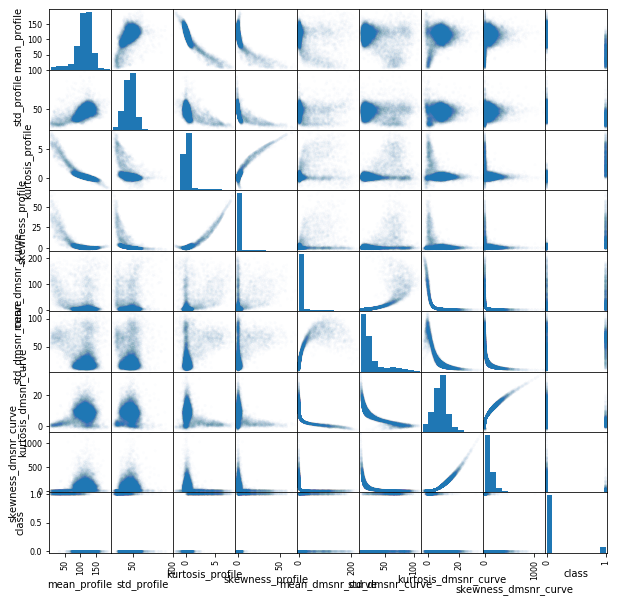

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Корреляция параметров

In [19]:
data.corr()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,class
mean_profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
std_profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
kurtosis_profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
skewness_profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
mean_dmsnr_curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
std_dmsnr_curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
kurtosis_dmsnr_curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
skewness_dmsnr_curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


График показывает соотношение коэффициента эксцесса от ассиметрии

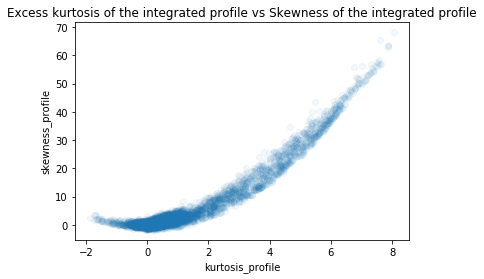

In [20]:
plt.plot(data['kurtosis_profile'], data['skewness_profile'], 'o', alpha = 0.05)
plt.xlabel('kurtosis_profile')
plt.ylabel('skewness_profile')
plt.title('Excess kurtosis of the integrated profile vs Skewness of the integrated profile')
pass

Графики соотношения эксцесса от кривизны для интегрированного профиля и данных, полученных из DM-SNR соответственно

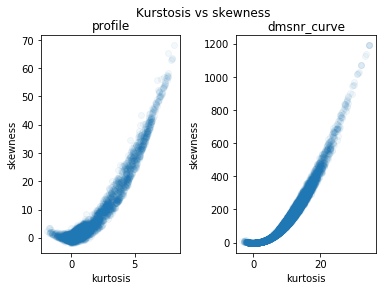

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Kurstosis vs skewness')
ax1.plot(data['kurtosis_profile'], data['skewness_profile'], 'o', alpha = 0.05)
ax1.set_title('profile')
ax1.set_xlabel('kurtosis')
ax1.set_ylabel('skewness')
ax2.plot(data['kurtosis_dmsnr_curve'], data['skewness_dmsnr_curve'], 'o', alpha = 0.05)
ax2.set_title('dmsnr_curve')
ax2.set_xlabel('kurtosis')
ax2.set_ylabel('skewness')
plt.subplots_adjust(wspace =.4)

#plt.scatter(x = "kurtosis_profile",y = "skewness_profile",
#            data=data[data["class"] == 1],alpha=.7,
#            label="pulsar stars",s=30,color = "g",linewidths=.4,edgecolors="black")
#plt.scatter(x = "kurtosis_profile",y = "skewness_profile",
#            data=data[data["class"] == 0],alpha=.6,
#            label="not pulsar stars",s=30,color ="r",linewidths=.4,edgecolors="black")
#plt.axvline(data[data["class"] == 1]["kurtosis_profile"].mean(),
#            color = "g",linestyle="dashed",label="mean pulsar star")
#plt.axvline(data[data["class"] == 0]["kurtosis_profile"].mean(),
#            color = "r",linestyle="dashed",label ="mean non pulsar star")
#plt.axhline(data[data["class"] == 1]["skewness_profile"].mean(),
#            color = "g",linestyle="dashed")
#plt.axhline(data[data["class"] == 0]["skewness_profile"].mean(),
#            color = "r",linestyle="dashed")

Является ли кандидат пульсаром

In [22]:
data['class'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
17893    False
17894    False
17895    False
17896    False
17897    False
Name: class, Length: 17898, dtype: bool

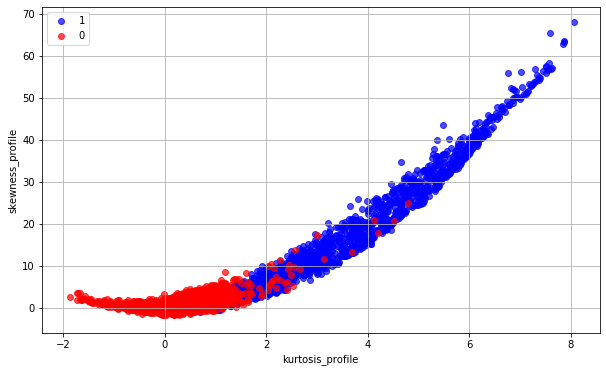

In [23]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 1]['kurtosis_profile'], 
            data[data['class'] == 1]['skewness_profile'], 
            alpha = 0.7, label = '1', color = 'b')

plt.scatter(data[data['class'] == 0]['kurtosis_profile'], 
            data[data['class'] == 0]['skewness_profile'], 
            alpha = 0.7, label = '0', color = 'r')

plt.xlabel('kurtosis_profile')
plt.ylabel('skewness_profile')
plt.legend()
plt.grid()

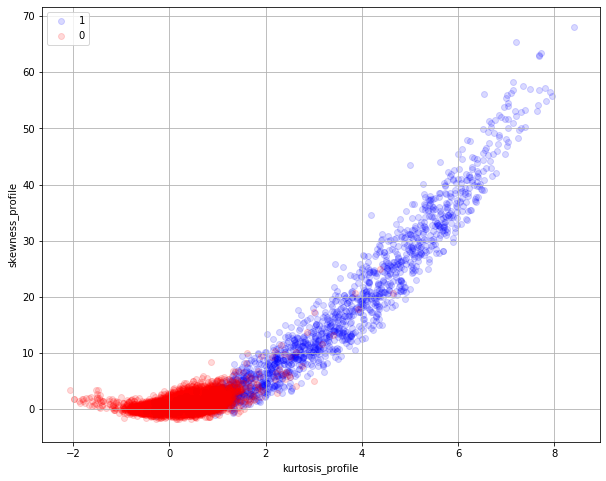

In [24]:
np.random.seed(0)
kurtosis_prf_rnd = data['kurtosis_profile'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(kurtosis_prf_rnd[data['class'] == 1], 
            data[data['class'] == 1]['skewness_profile'], 
            alpha = 0.15, label = '1', color = 'b')

plt.scatter(kurtosis_prf_rnd[data['class'] == 0], 
            data[data['class'] == 0]['skewness_profile'], 
            alpha = 0.15, label = '0', color = 'r')

plt.xlabel('kurtosis_profile')
plt.ylabel('skewness_profile')
plt.legend()
plt.grid()

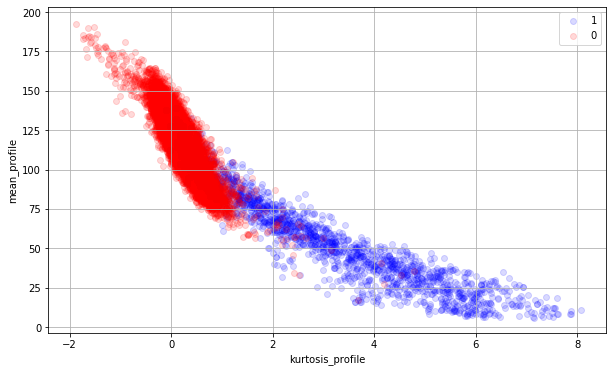

In [25]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 1]['kurtosis_profile'], 
            data[data['class'] == 1]['mean_profile'], 
            alpha = 0.15, label = '1', color = 'b')

plt.scatter(data[data['class'] == 0]['kurtosis_profile'], 
            data[data['class'] == 0]['mean_profile'], 
            alpha = 0.15, label = '0', color = 'r')

plt.xlabel('kurtosis_profile')
plt.ylabel('mean_profile')
plt.legend()
plt.grid()

Параметры столбцов с типом float

In [26]:
data.describe(include = ['float'])

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


Параметры столбцов с любым типом

In [27]:
data.describe(include = 'all')

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [28]:
data['kurtosis_profile'].unique()

array([-0.23457141,  0.46531815,  0.32332837, ...,  0.1593631 ,
        0.20116138,  1.40639105])

In [29]:
data['mean_profile'].unique()

array([140.5625   , 102.5078125, 103.015625 , ...,  84.421875 ,
        98.7265625,  57.0625   ])

In [30]:
for item in data['kurtosis_profile'].unique():
   print(item, data['skewness_profile'][data['kurtosis_profile'] == item].iloc[0])

-0.23457141199999998 -0.699648398
0.465318154 -0.515087909
0.323328365 1.051164429
-0.068414638 -0.636238369
0.600866079 1.123491692
0.53190485 0.41672111700000003
0.03146022 -0.112167573
-0.158322759 0.389540448
0.452688025 0.170347382
0.465881961 1.162877124
-0.320328426 0.283952506
-0.081059862 0.115361506
-0.135303833 -0.080469602
0.325437564 0.661459458
-0.031852329 0.046797173
-0.09449890400000001 -0.287984087
0.13763583 -0.256699775
0.39383679200000005 -0.011240741
-0.045908925999999996 -0.271816393
1.5471969669999999 4.1541060430000005
0.6274865279999999 -0.026497802
0.142653801 0.32041967600000004
0.326386917 0.8035017940000001
0.257953441 -0.40504907700000004
0.378355072 -0.266371607
0.279390953 -0.129010712
0.14259672699999998 0.018885442
-0.002549267 -0.46036028700000003
0.179376819 -0.17728516
0.23043898399999999 0.19332537100000002
0.09486039800000001 0.68311261
0.475728501 0.7814861959999999
-0.049280400999999995 -0.208256987
-0.470772686 -0.125946417
0.177360308 0.02491

0.088895868 -0.037392548
0.23875623199999998 1.24360488
0.773959568 1.4358012390000001
-0.25041830600000003 0.39209058799999996
2.841558376 7.8328193420000005
2.4012805569999998 5.858265485
2.291890704 10.11847881
-0.171089324 1.759547472
-0.006741335 -0.483954786
0.885005976 3.0601195430000003
-1.082567379 0.624954452
-0.056778507 -0.091045708
0.876430624 3.429234258
3.887521273 19.89781024
0.557590962 1.523933611
5.896484312999999 35.28723836
-0.008927546 -1.676724149
-0.6274929229999999 1.640910525
0.590232622 0.37317048799999997
0.409147253 0.073141345
0.771429533 2.235645796
0.832017508 3.1265142619999997
-0.049849940999999995 0.17309434899999998
-0.060033660999999995 -0.139937287
0.467777239 0.45805371
0.268410223 -0.169219124
0.6133261839999999 2.178786108
-0.131181187 -0.270214665
0.12515654699999998 0.33191264600000003
0.328236045 -0.09480347900000001
0.12097650000000001 -0.216995758
0.125082277 0.240095781
0.203304304 0.186340061
0.282335975 0.09885138199999999
0.292680802 -0

-0.136258025 -0.403809474
0.606270094 2.52160106
-0.176937896 0.346115155
0.19859126100000002 0.536032651
0.298250273 0.633269505
0.078459969 0.131429308
0.294649006 0.200201431
0.7216631370000001 1.517343046
0.14948043 -0.423033324
0.21640060600000002 0.9319343959999999
-0.016486433 -0.43303290200000005
0.393578765 0.062708885
0.8367108329999999 1.7253502490000001
0.013689465 -0.37891878700000003
0.481746908 0.806312499
1.53630905 0.73669556
0.561780715 1.29622791
0.198342059 0.34010668899999996
0.285179422 0.1733036
-0.08543328800000001 -0.730157945
0.06353714099999999 0.393842452
-0.12968547 0.150916101
0.067857282 -0.492522577
0.437014545 0.19316833100000003
-1.111627259 0.9653853170000001
0.47936245200000005 0.7412838979999999
0.31991017 0.273822984
0.291259453 -0.15893406
-0.17707974 -1.10112952
-0.067812732 -0.41567356299999997
0.126371985 -0.081485833
0.263537322 0.470200519
0.637397745 2.816726796
0.2433902 -0.030992473
0.5855127720000001 2.010289024
0.435447343 0.460874681
0.

0.22468663600000002 -0.153875861
-0.10328253300000001 -0.8546975920000001
0.070690936 -0.583442506
0.051931131 -0.309564258
1.202599271 0.7273641740000001
-0.006619941999999999 -0.839473147
0.128542831 -0.26894899899999997
-0.076180711 -0.346191129
0.256588826 -0.209024052
0.28390140199999997 0.158311332
-0.135262855 -0.5158904910000001
0.195952435 0.073894933
0.38385132200000005 1.14512361
0.014281377 -0.45858662200000005
0.032943787 -0.25225520100000004
0.040035799 0.6133664910000001
0.45477350299999997 0.168205992
0.416257923 -0.20209355399999998
0.066498444 0.458767396
0.18489321399999997 -0.316643572
0.10176792400000001 0.378525637
-0.257080818 -0.718214496
0.408965675 0.147360567
0.714160259 1.979993268
0.35692357 0.943613805
-0.10160704400000001 0.045648351
-0.062832635 -0.495370674
-0.876452626 0.408800282
0.340412681 0.665919457
0.658723525 2.102054726
-0.058997405 0.11622912
0.43045373 0.979516405
0.43751835200000005 0.615727793
0.22899202600000002 -0.253830757
0.263881221 0.

0.034216034 -0.22161963199999998
0.543042813 0.5646127129999999
1.068501352 4.841126883
0.63982303 1.545838684
0.279514205 0.008017106999999999
0.257208357 -0.605215449
-0.1060387 -0.249317189
0.013770718999999999 -0.384748029
1.432916528 0.936654202
1.522564529 4.05683926
0.0490332 -0.057811734000000004
0.303389333 0.487826078
0.245742325 0.140377159
0.59113625 0.64599645
0.38211481399999997 -0.299731538
0.130436153 -0.428144532
1.553546259 5.185332343
4.430806168999999 24.5163329
1.878733996 6.119066012999999
6.4350120120000005 42.46402931
0.314129003 -0.748100477
0.09796041300000001 -1.114987061
0.02766102 -0.47952981200000006
-0.046338967 -0.25415533100000004
0.16287752 0.116571244
0.13233844 -0.31717440399999997
0.35461800299999996 1.047575661
0.353256495 0.0981407
3.1428019660000004 10.5891811
0.080797047 0.468334236
4.9810600869999995 28.37821898
2.2243425880000003 7.188845541
0.061304988 -0.575957603
0.144112199 -0.42885561
3.7169504680000003 13.10581926
0.0036010459999999997 0

0.331539531 -0.43918938700000004
0.237408559 0.584851375
0.19277946399999998 -0.447172661
0.046953842999999995 0.05011422
-0.185332439 0.19062993
0.370364155 0.252319362
0.24078415 -0.267016026
0.596736354 2.643345778
-0.073592913 -0.29660162100000004
0.71289786 3.3887185630000003
0.12497158800000001 -0.35420926700000005
0.155119603 1.848981136
0.18162467699999998 -0.098036358
0.467865185 0.52613833
0.19698186399999998 -0.314346243
0.078958572 -0.6836976459999999
1.723098235 6.096537099
0.14839837 -0.222537449
0.414664198 2.443440085
0.46861828200000005 1.118563213
0.7408519570000001 4.2099894860000004
0.510415259 1.6726030230000002
-0.033964026 -0.06741810599999999
-0.09537627 0.020132088
-0.153914426 0.936699235
-0.123019295 -0.052523223
0.310986416 0.614195367
0.42090476299999996 0.589357792
-0.213927538 0.556194166
0.561321992 2.6208636480000003
0.074069462 -0.237292248
-0.070325519 -0.17103378100000002
0.12615986 -0.44812264700000004
-0.129170844 0.17571287
0.6381073820000001 1.43

0.212761643 -0.047675975999999995
0.28010961 0.026061998
0.243585949 2.531542
-0.308777108 1.346463147
0.30222686 1.480224011
0.32230790000000004 2.027642141
0.042452257 -0.23921046899999998
0.011557872 -0.349567426
-0.406498365 0.281909753
-0.133616354 -0.234672319
0.342266367 0.40805734899999996
-0.14812520699999998 -0.114140774
0.701410675 2.521262046
-0.058577693 -0.26318460899999996
0.021220137000000003 0.15581999800000002
0.363575505 -0.466395005
0.179596455 -0.006525724
0.8717746340000001 3.877460063
0.233214315 0.8709991140000001
0.16207778 0.49717127899999997
0.142625694 0.11357700300000001
0.307826761 0.546704967
0.529993376 0.28385333100000004
0.803473542 4.018279676000001
0.105088389 0.21319349199999998
0.067585331 0.061427247000000004
0.087966484 -0.13326712599999999
0.7883165790000001 0.775012947
-0.167443803 0.498522171
-0.033179037 -0.132086624
0.262902617 0.258464885
0.13096893 -0.26256340300000003
0.679989996 3.748876016
0.18729024100000002 0.38041828200000005
0.57712

-0.046301522000000005 -0.09640973800000001
-0.163795361 -0.48918541
-0.313311753 0.082159219
0.361222857 0.09826151400000001
0.09370646199999999 -0.148988103
0.402754911 0.215220976
0.29264295 -0.235992772
-0.022241827999999998 0.45317774299999997
0.282871836 -0.109041705
0.304007603 -0.34575682799999996
-0.321808257 0.026652335
-0.035829587999999996 -0.093891055
-0.05053384599999999 0.548197797
0.32612901699999997 1.159903851
0.519707876 0.565347386
-0.098372045 -0.68067275
-0.131174189 -0.591006571
-1.337440646 1.529638655
4.029005514 20.62460409
0.030691386 0.03220154
0.259008014 -0.39915134700000005
-0.041416113 -0.006091047
-0.054431105 0.328758906
0.587264944 2.547754085
0.16004589 0.546565712
-0.130509736 -0.246101116
0.082624868 -0.48628307200000004
0.373997862 0.034616752
0.21843691899999998 1.507569037
-0.011411491000000001 -0.118162179
0.336422134 0.09841916
0.421143692 0.5761440489999999
0.260014525 0.240895345
0.261443348 -0.157273348
0.38152029 0.17992709899999998
0.58664

0.04782431 0.34050317700000005
-0.04889721599999999 -0.625732131
0.461996064 0.037572121
-0.109571793 -0.353296946
0.677882578 0.280251157
3.617343951 13.586890700000001
0.534649471 0.728742233
0.38944203 0.174857851
0.021421252999999998 -0.504309825
0.157463412 -0.6112381689999999
0.126731399 -0.639633669
1.142037416 4.804595738
4.256673392 24.71317852
1.4885286180000001 2.243387011
0.76791154 1.59853819
3.411557128 19.18811773
0.095494601 -1.18570551
0.318182283 -0.17723411
6.374391895 41.45140851
1.34845305 3.6939094889999997
2.381897034 9.960942887
0.125734707 0.668161838
2.744515077 8.742341031
-0.05671806099999999 0.083811125
0.21877232100000002 0.9376554
0.76620027 3.220728396
3.410426087 16.839253600000003
2.180057856 6.701225373
2.5168044640000002 8.391360157000001
0.033799794 -0.34109323700000005
2.40134034 6.693899684
0.43546892200000004 0.47133902200000005
-0.201917942 0.370917933
2.021413855 4.14043647
-0.122444015 -0.089395096
0.350437357 0.282473689
0.550702236 1.4697760

0.241780238 0.453567585
3.644463097 24.13786255
0.367746953 -0.227498853
-0.11410334800000001 -0.23842539999999998
0.190182999 0.18243066100000002
0.919729114 3.3075155019999998
0.08074281400000001 -0.145408139
3.540392619 18.44180873
0.022625611 -0.016207911999999998
0.046611362 -0.238531543
4.7071339189999994 30.38440322
-0.05447046 -0.702204576
1.4673805780000002 1.3799628830000001
0.319377521 0.5792589020000001
1.6176253919999999 5.240351492
1.7590155680000001 5.136681615
1.9746109619999999 8.210833977
0.420997999 2.133087804
0.19457834899999998 0.385063882
1.2231845140000002 2.269114346
0.382145495 1.1804754579999999
1.2862110709999999 4.99227648
0.6788378709999999 4.157021908
2.256866729 9.635625503
0.539807018 1.222230548
0.066960611 -0.020170647
5.859133735 35.45942226
0.428819116 -0.595279906
1.801754237 4.555957337
4.4175190419999995 25.65261075
0.179404339 -1.764717446
0.300155136 -1.445820498
2.191145781 3.424513625
0.84647815 1.01997225
5.365693006 31.54724723
1.128727696 

0.602240652 3.485344757
4.385239948 20.81496821
4.334565003 26.33986977
0.108764734 -0.48051227700000004
0.15941345699999998 -0.065702437
0.500761131 0.04358791
0.22274962899999998 0.088923559
0.30004755 0.423681849
-0.015012615 -0.24770479899999998
-0.149405084 -0.363522588
0.06946255700000001 -0.950975107
1.667338589 4.096050525
0.409876964 0.852931843
0.537548554 0.495895796
-0.047394727000000005 -0.265489099
0.340814611 0.269248569
0.46790714299999997 0.573404013
0.296923941 -0.265318992
0.48461352399999996 2.091132265
-0.155449062 0.209085642
2.27949841 5.515417342999999
0.287416016 -0.11721548400000001
-0.34329542399999996 0.391281115
0.531148023 0.992917356
-0.079014263 -0.550983318
0.16713039400000002 -0.259674427
0.618096137 0.765135096
-0.23649769899999998 0.352750235
2.3729610269999997 4.1990833919999995
2.7047854719999997 11.609644
-0.19480019699999998 -0.23734973199999998
0.316186815 -0.008498041999999999
0.131620443 -0.102737261
-0.302822026 1.469614195
0.482742082 0.9233

0.11568036 -0.069998041
0.174426544 -0.07127457
-0.060534795 -0.693942891
0.08528079 0.09604766099999999
0.6621320279999999 2.529359158
0.14625492199999998 -0.253824518
0.22837132699999999 0.429684237
-0.346319759 0.09526859
0.139749819 -0.286050465
0.654533512 2.941114165
0.10692673 0.28489734
0.397816919 0.590102639
5.3266527560000005 28.12321137
-0.148888095 0.18762009
0.205638567 0.304859497
0.580004199 2.366041498
0.221610962 0.213615412
0.516410809 0.370935519
0.750072895 0.787285775
0.155024574 0.009325055
0.053728324 0.038934547
0.442356339 0.463952655
4.132751898 21.93084176
0.9129237990000001 5.06185781
0.180366534 0.277299368
0.222115922 0.38784201799999996
4.091050433 17.52244822
0.771777885 1.6817643709999999
0.08629058199999999 -0.043791332
0.201745788 0.48342976600000004
0.671160269 1.106154603
-0.3213797 0.167869212
0.450477233 1.557485679
0.122327625 0.304724544
0.629775809 1.247183504
0.485436254 0.32231375
0.269005268 1.01137724
0.382374152 0.20492786100000002
0.3136

0.774831802 2.642144215
-0.09610445199999999 0.98623425
4.619730606 21.42781175
0.058052469 -0.038008214
0.228124149 0.845815495
-0.226842719 0.08254575900000001
0.6504475479999999 0.661009395
-0.07151877400000001 -0.150064706
0.276643292 -0.35073241299999997
0.6695150470000001 1.9930046190000001
-1.6242694709999999 1.7274893740000001
0.17364252100000002 -0.24751109699999999
0.371875654 0.565669745
1.082698929 3.73908179
0.476789764 0.591543832
0.009003371 -0.17083241300000002
0.36923445 -0.215354839
0.38671779700000003 0.032412194
-0.22822509 -0.7319038240000001
0.348613871 0.18867846300000002
0.8434123490000001 2.443362264
-0.035055242 0.544146454
0.16532060099999998 -0.620564338
0.17861426600000002 -0.461199956
0.432821613 0.531318183
0.013274784 -0.458298508
-0.12669682300000001 -0.588314825
0.611719041 0.575856529
0.013859462 -0.007647327
-0.004076168 0.036205036
-0.029268826 -0.23415802
0.19132638300000002 0.23357012100000002
0.318700037 1.468051559
0.356099802 0.354921718
0.6062

-0.130254525 0.31438876
5.389806776 28.81278583
2.869593016 13.65133857
7.088609517999999 50.95424904
0.409719338 -0.321361354
1.891876111 8.195140975
7.1526906210000005 51.59138187
5.186652969 33.78045606
2.7347993760000002 13.61856663
2.6757932540000002 11.95903647
0.534283803 0.30864172100000004
3.360496626 16.17794592
-0.070604346 -0.6771925740000001
0.43791546200000003 0.556886629
-0.17443934 -0.5304823879999999
0.09262625599999999 -0.336586819
-0.196461092 -0.221117872
0.664891585 2.651056225
-0.008674895 0.21481010899999997
0.6686849260000001 1.214209783
0.035168132000000005 0.160952768
1.754955925 4.937735773
0.373923285 0.641911948
3.73105918 13.47608949
0.43370687399999996 3.3220476569999997
0.09765851800000001 1.9843149080000002
-0.065494187 -0.0033019670000000003
0.162129107 -0.10150438199999999
-0.09933993 -0.371068379
0.106972803 -0.36032949
-0.8931698159999999 0.22849779
0.141865082 -0.30226579
0.15746021400000001 -0.302446437
6.793773206 48.16864374
0.44554617700000004 

0.143923086 -0.185732397
0.19533128800000002 0.087066594
0.025313287 0.17832997
0.209590665 -0.22465490300000002
1.037060686 3.324662015
1.0179152790000001 -0.624377062
1.064485197 -0.543938707
0.157763181 -0.427245651
-0.084411381 0.36033429
5.905340947999999 37.54994916
-0.070374765 -0.38923270600000004
2.177202406 9.119310279
5.6054110139999995 34.19729064
4.700482747 27.688921899999997
0.067024435 0.081050328
0.55060811 1.294496906
1.586844849 5.187632711
5.375643305 33.92807773
0.046120647 -0.566334407
4.76063117 27.31095198
1.554362622 6.395422289
2.04966648 8.119674898
5.350709151 35.27651674
0.716237937 3.606693851
0.155101457 -0.34057389899999996
-0.200888669 -0.519170796
4.19320032 25.54482025
5.748145325 36.10484586
0.183625934 0.143575895
0.100115292 -0.40039458899999997
0.146134613 -0.08233392
5.859790675 38.80265987
-0.35201788100000003 0.271566622
3.897921826 15.72025702
0.211043743 -0.151209565
-0.01810346 0.13282319199999998
0.001272369 0.53893791
-0.086687946 -0.53073

2.521937363 12.73157816
3.884819846 16.5225833
0.145641461 0.257326879
0.24141342 -0.050158237
3.0608215160000003 14.80017013
1.054746924 2.00513662
-0.28211195899999997 -0.201963853
0.278589614 0.094634599
5.781621754 36.33574371
5.9156660720000005 38.476547499999995
1.3659584869999999 2.5369325430000003
0.683820749 1.3816160880000001
0.15385928199999999 0.43447999600000003
0.573283592 2.561399823
-0.12311019999999999 -0.550207297
2.261648047 6.779405708
6.289581703 40.81030379999999
0.8547370759999999 -0.257755297
0.693107927 -0.614142075
-0.307301946 -0.30418292199999997
0.14007462099999998 0.09305319199999999
0.438737225 -0.217506322
0.297715014 0.42864552899999997
-0.255289757 -0.389384666
1.9908297830000001 3.713695014
-0.127319051 -0.172902127
0.318144821 1.39815974
0.21342161199999998 0.37246565200000004
0.854319818 2.047680469
0.059918858 -0.23621087
0.223487618 -0.433364152
4.839073399 30.31634386
2.001883491 9.361044194
1.825590122 6.507033765
2.5630825880000003 13.72383566


0.279349545 -0.426104565
4.713509786 22.82037117
-0.017319441 -0.008215041999999999
0.654479493 0.942221932
0.529269012 1.277426048
0.142341622 0.186575092
-0.00043312699999999995 -0.37620286399999997
0.44831926299999997 0.614358901
0.09791965400000001 -0.39370549
0.39369994799999997 -0.331209205
0.111285201 -0.311459557
0.5583313879999999 2.4970148919999997
0.042272872999999996 0.39218035799999995
0.190534483 1.17205149
5.324693064 32.13511206
0.42739968100000003 0.833560533
0.232240367 -0.175304772
0.11996440800000001 -0.5206483129999999
0.129609329 -0.09812054699999999
0.28162882300000003 1.3050345620000001
0.328619322 -0.347524523
0.27828631600000003 0.648750879
0.324098342 -0.018159118999999998
0.192672357 -0.20091080100000003
0.062210015 -1.135840371
0.6937099179999999 2.344036911
0.11848114300000001 0.119315171
0.17323575600000002 -0.468154216
-0.039669302999999996 0.354226386
-0.18205785300000002 0.116136923
0.540534452 0.24203225
0.519942751 0.319810057
-0.00469725 -0.38868724

0.039595926000000004 -0.518205702
0.10925972800000001 -0.231491682
0.563215008 0.38214989
0.177109378 0.11115750099999999
0.706635986 2.3704451669999997
0.593121724 1.3974352490000002
0.5285131789999999 2.228082477
-0.118460593 0.44122388700000004
0.491747782 0.6124631389999999
0.6988748690000001 2.602343681
0.078090646 -0.39993856
0.44638015200000003 1.071448151
0.095371655 -0.713314903
0.348621461 -0.009344459
0.632789857 1.322000727
0.29729115100000003 0.187720917
0.196139967 -0.302252918
0.22360445399999998 0.210615755
0.309723848 0.35225148799999995
0.7352279759999999 0.767092927
0.148638825 -0.40804103700000005
0.32624155 0.300459773
0.87632305 2.656187089
0.50630757 2.483727013
0.9544995559999999 1.2595739479999999
0.37659200200000004 0.40483195299999997
0.40512665700000006 0.189427147
-0.339208936 1.014557326
-0.04968755 -0.258694487
0.497394094 0.417097207
0.45100740799999994 -0.045750658
-0.118616815 -0.13738477
0.39106278899999997 0.227022241
0.416162816 0.5182323870000001
0

0.394304043 0.612738236
0.437665371 0.273761385
0.262940935 -0.191775835
0.224027232 -0.196070734
0.580524256 1.4526306740000001
0.43465597200000006 0.710722124
0.592274878 2.150063854
0.05181362 0.02390955
0.38363251200000004 0.37691368799999997
0.446644531 0.677596174
-0.09665601 -0.7109024
0.06893632599999999 0.067064809
-0.126985181 0.9657604390000001
-0.080020598 -0.17583947
0.003110939 -0.178795003
0.368462264 0.08410011099999999
0.078356605 0.245278933
0.00923047 0.10144959199999999
-0.22023927399999998 -0.6503591320000001
0.180508187 -0.172513489
0.300131714 1.0139246929999999
0.415156525 0.41102218
0.407026793 0.9800110470000001
0.45121259 1.047022095
0.666298663 3.4126792619999997
0.111973564 0.30349472
-0.559570859 0.610928137
0.19628306199999998 -0.088269059
1.04460863 2.732295138
0.018147821 -0.43376869100000004
0.246678318 0.071911629
0.46104366700000005 0.38434914600000003
0.04966506 -0.589685971
0.47371011700000004 0.472570348
0.037681827 -0.124435672
-0.091849302 1.387

0.601863919 0.35096999799999995
0.45434783100000004 0.8408078290000001
0.292900657 -0.017469318
0.633738245 1.890784469
0.051408079 -0.249398712
1.06864223 2.9530305660000002
-0.000936365 -0.388571513
0.373527785 0.635847582
-0.063436114 -0.10020071800000001
0.300047317 0.759060947
0.233873954 -0.749568597
0.168711456 0.358610975
0.6719124940000001 0.402359759
0.125523561 -0.110626991
0.523843215 0.423115571
-0.194952879 -0.14044240800000002
0.463717091 0.207592163
0.701465388 1.104580881
0.22829524 0.266826801
-0.236845584 -0.35834840700000004
0.8337942220000001 3.6527106639999998
0.35985850700000005 0.48822767200000006
0.358735721 1.308870578
4.631868717 22.6745638
0.143675394 0.980897334
0.198636885 0.306772373
1.5403874819999999 4.797428213
2.635561296 10.13713674
0.251305925 -0.450611626
0.15864012 0.167519405
0.862734296 1.38698187
4.9116087319999995 30.04790545
0.22790740199999998 -0.033014187
0.32728937199999997 0.075251574
0.09509435699999999 -0.28414314
0.914116651 -0.4884710

2.182435889 6.24572824
-0.062810056 -0.001003774
0.287554759 0.468925597
-0.17845139 0.840849603
0.6079880679999999 1.365763375
0.069752026 -0.777233767
0.168922513 -0.628530945
-0.226691103 0.016222596000000002
0.38773853700000005 -0.34359057299999995
0.47495587899999997 1.298153737
2.18369337 6.6798202589999995
0.418338759 0.7942631729999999
0.320150946 0.35022732799999995
-0.046138113 -0.041587865
2.816973782 12.34781475
0.137482233 0.318378531
0.44022837 2.392232495
0.309543254 0.627811482
0.20905285699999998 0.502714114
0.43082077399999996 0.784111213
0.47325229 0.333488722
0.10872169999999999 -0.515526126
0.44391106700000005 1.820415081
0.325679806 -0.003990403
-0.018505296 -0.386956026
0.394855665 1.8846524009999999
0.12343521 -0.750111997
0.397291238 0.22422551300000002
0.21189049399999998 0.443069685
2.9036261430000003 15.15971081
0.061310236 -0.5908194999999999
0.040776823 0.9906560959999999
2.7228911019999997 7.9973879089999995
0.276503247 0.12298037199999999
0.2819465889999

3.347547018 10.45598155
0.20263543 -0.21868738399999998
0.057189523 -0.14228706300000002
0.5035025989999999 0.133622394
0.340164376 0.880671746
0.504295246 0.821088334
0.26085367600000003 -0.380045294
1.314571449 2.081513939
3.2681052139999998 15.02731718
-0.061827667 -0.309242141
-0.022557584 0.333709395
0.050999573 -0.160202922
0.376230068 0.26745633399999996
0.152675153 -0.069345956
0.07493838900000001 0.017353083000000002
0.124991718 0.388624143
0.229191755 -0.23025811
0.126804587 -0.06931105900000001
0.17704341899999998 0.155086328
-0.279949338 -0.37912521299999996
1.1458322840000001 4.196603218
0.289198774 0.005767820999999999
0.09702834800000001 -0.668818021
0.08848883099999999 0.048365099
0.538980864 2.46232529
0.263267608 0.547251201
0.0206158 -0.357913429
-0.07203934299999999 0.296130698
0.0034227140000000003 0.82459259
0.206371098 -0.075432893
0.08401438900000001 0.09274797
4.164490187 18.16470068
0.661990223 2.18534282
0.080828361 0.43940351
4.347698018 18.75114241
0.496350

-0.021936028 0.040586654
0.130531573 1.102368188
0.23674253899999997 -0.307321177
0.21319084300000002 -0.214863948
0.167442148 0.40073053299999994
0.039945764 -0.130182446
0.14477330900000002 -0.332363815
0.175343053 0.039587929
0.06984410099999999 -0.658005835
-0.00032109900000000004 -0.005414777
-0.174149285 0.366123308
0.19121880300000002 1.099188056
0.434842921 -0.21384363399999998
0.36844750299999995 0.714818084
0.726354899 1.82809812
-0.008339935 0.148322174
0.191463406 0.07602706599999999
4.311137093 22.85493637
-0.08633835599999999 -0.43173107200000005
-0.055749177999999996 -0.10926162699999999
5.9427150189999995 36.91478672
0.538556988 0.626551326
-0.023167704 0.347119959
-0.20455948100000002 0.011302447
0.128193801 -0.16812911100000003
0.108952257 0.7423211129999999
0.11560565199999999 0.462337615
1.128441314 2.58304544
0.327066072 0.264915668
0.046232199 1.876971985
0.320634984 0.41198542200000005
0.31874763300000003 0.210613912
1.582277875 4.229061893
0.13477403400000001 0.

2.4622316630000003 9.16285605
0.18881028100000002 -0.13749560000000002
0.24228717100000002 0.499872264
-0.125243256 -0.415331192
0.231786939 -0.169727245
-0.049696733 -0.418949771
0.243269235 -0.179898575
5.642803187999999 37.94416905
0.29101600699999997 -0.438014659
0.649429729 1.4822092580000001
-0.520187579 -0.028943156
0.398037518 0.09376991900000001
5.601090703 40.16710305
0.36370381399999996 2.01211553
0.838173938 1.6945383630000002
0.067332697 -0.24899588399999997
0.322935232 0.651073165
-0.316593621 -0.148235665
-0.008001031 -0.39200832700000005
0.439524363 0.5045304110000001
0.37163786 1.343421367
-0.311782216 0.510870775
-0.72770407 -0.102836168
0.17957259399999997 0.15486082
-0.038416306000000004 -0.23323988899999998
0.253322478 0.770027144
-0.320773588 -0.050315942
0.45120164700000004 0.580289745
0.18304239 -0.075925288
0.00452307 -0.376730678
0.588965764 0.161899008
0.83835981 0.534832139
-0.113968578 -0.40167324200000004
-0.104215901 -0.354066935
0.516893224 1.85124323800

0.245270143 0.276052922
0.125808891 -0.591541835
0.283450145 0.48046057700000006
0.15077565 -0.22450535800000002
-0.023317526 -0.696880594
0.448722621 0.46883542
0.33741794799999997 1.281895477
0.093161028 0.235490587
0.221991868 0.646551746
0.36527310700000004 -0.026960391
0.685667618 1.257409487
0.13359981099999998 -0.310855156
0.262268388 0.23072226399999998
-0.241413855 -0.08914197199999999
-0.313315252 0.867396967
0.131396869 -0.218169857
0.076775657 -0.316044487
0.188709348 -0.39352103299999996
-0.030454027999999998 -0.215418369
0.388932381 1.881108187
0.31432021 0.582672266
0.110689295 1.223632929
0.8720969829999999 2.749048024
-0.0221606 -0.46462465299999994
0.303747682 0.366281225
0.11114609199999999 -0.063491353
-0.157853185 -0.698161438
0.17974269699999998 0.344964304
0.563302536 1.868518235
-0.249038841 -0.078704024
0.09800359 0.31270953
0.15254156 -0.32527974800000004
0.25529983 0.014146761
0.51811174 1.258839705
0.5328755620000001 0.626410197
0.420293779 1.07538842
0.3800

0.602729258 1.934605388
0.252630559 0.303181314
-0.21439574600000003 -0.021389706
-0.044139171 -0.471336501
0.25106672399999996 0.267032664
0.50830202 0.270972777
1.403325165 2.1776367580000002
0.828310557 1.789748921
0.149426015 -0.30952984699999997
0.051920888 -0.497854233
0.332523412 0.242907514
0.539861221 1.001518597
-0.32970877600000004 0.128347982
0.97784848 2.396694926
0.044329670999999994 0.8771002529999999
0.13699899199999999 -0.444882409
-0.033862263999999996 0.15919439300000002
0.025583999 -0.236608364
0.58863912 2.383210557
3.2370444560000005 12.533773199999999
0.22679808 -0.188177432
0.15681978900000001 0.386706583
0.6981279859999999 1.3600268
0.10950501300000001 0.8549891740000001
0.213524467 0.22750471
-0.153797712 -0.264728502
1.3296837129999999 3.939896618
0.11712103300000001 -0.342901434
1.333943536 2.315716718
0.174416994 1.667266687
1.3632267619999998 6.750024558
0.014687015 -0.229723813
0.065169862 1.256772563
0.739547525 2.152050499
0.445185011 1.458504286
0.0609

0.352015361 0.219464333
0.131694604 -0.17164027399999998
0.173415618 0.9379313340000001
-1.2907389870000001 1.540594276
-0.092444085 -0.09819273699999999
4.903291898 24.37947791
0.429166659 4.124845562
0.24376662300000002 0.548668904
0.58450031 0.995612284
0.20136825600000002 0.7491701759999999
0.8981837690000001 1.788926855
0.7797301390000001 1.9043723609999998
0.155816575 0.28812409699999997
0.324989984 -0.09313917099999999
0.37521904 0.030498802000000002
-0.09121103900000001 -0.042552963
1.036647925 0.8123410040000001
-0.127177558 0.560059919
0.47350082600000004 0.308050886
0.696856445 1.1429751959999999
-0.087278151 -0.47833649899999997
0.298933167 -0.123396453
0.244001788 -0.028442105
0.375583834 0.8125453570000001
1.06584827 1.972204387
3.6764089939999995 12.92233842
0.9122253370000001 1.99733417
0.35356919 0.12247399699999999
0.37158864799999997 0.20792817
0.101663708 -0.08782148
-0.24078520399999997 -0.487395509
1.85835033 6.236208764
0.117231709 0.107389921
0.084368555 -0.0983

0.480117079 1.043177635
0.075723822 0.785127901
-0.355294877 0.064232539
0.308289479 -0.421265194
0.178290242 -0.257009912
0.054835699999999994 0.30926181399999997
0.48054988 1.115247371
0.147102812 -0.373089166
0.142796246 -0.094340606
0.326604169 -0.298136852
0.36650911700000005 0.296793264
0.6219667879999999 1.050666918
0.566579808 0.7843077540000001
0.562282694 0.048461030999999995
0.284707823 0.586571789
0.31919592 -0.202853087
0.089725724 -0.526481549
-0.07550438200000001 -0.076395427
0.649252493 1.8455859369999998
0.35288551100000004 -0.540344973
-0.05405043599999999 -0.637333237
0.058494385 0.29788942
0.248987359 0.38859599200000006
0.931108108 3.327492993
-0.013971566000000001 0.047274182000000005
0.369923766 0.07457612200000001
0.282265316 -0.074093535
0.18927129399999998 1.0807838570000001
0.012017385 -0.153749247
-0.07747626 -0.618906387
0.109857439 0.45982045200000005
0.16191001 0.5929645720000001
0.311490152 1.19379849
-0.12966176 0.17114982899999998
0.470004621 0.2594232

0.15802396 -0.495320252
3.654787601 13.90269145
-0.285003623 -1.087748183
0.11376048400000001 -0.23376217800000001
-0.036266866 -0.192143001
0.401373862 3.052846152
0.28555304 -0.45375175799999995
0.274789799 -0.433701205
0.441153552 1.8140310819999999
0.41276644799999995 0.522884156
0.179064823 -0.475249405
3.792205006 20.89345627
5.036449667 30.42817688
-0.531144854 -0.571877226
1.2193268659999998 3.156956814
-0.103120276 -0.52045906
0.198671601 -0.35320526399999996
-0.19243030100000003 -0.28980496
1.75397988 5.286093897
0.636548449 0.591727999
5.597915884 31.80896164
2.497482791 11.99754051
0.070729997 0.163260571
3.7896541939999997 17.40835227
-0.263480604 0.266983591
0.114704545 -0.284207205
1.690227856 5.954116332000001
-0.504758424 0.371809214
0.058965707 0.7713670709999999
0.95021601 3.67037603
0.18389007300000001 -0.224179295
0.441703884 0.989070372
0.195610062 1.024446083
0.36476694 -0.177954953
0.231768097 0.540982201
0.254268421 -0.280060146
4.1547333680000005 25.62494676
0

-0.18776203100000002 -0.314013278
0.167162487 -0.447538557
0.22669140899999998 0.569713438
0.586689392 0.440956743
0.360589465 0.511606153
0.131388271 -0.646702901
0.313033784 0.031815658
0.556661521 1.4910524809999999
-0.104322496 -0.461195229
0.28644866399999996 -0.467998786
0.11159665699999999 -0.16871837899999997
7.572576517000001 58.294501100000005
0.350768669 -0.474729301
0.25634324 0.017783592
0.16466915 0.271355791
0.48475725299999994 -0.09781989
-0.298781876 -0.193123701
6.9358225529999995 50.08672082
-0.103893766 -0.5597813620000001
1.013474814 5.019720361
3.90405159 14.34673449
0.252656944 0.985365943
-0.633054369 1.407235286
0.097801521 -0.17631789
0.31408215300000003 -0.10251292599999999
0.031310177 -0.36572180299999996
-0.111431225 -0.7499479459999999
0.22179195899999998 0.18549263600000002
-0.09344746400000001 -0.279533522
2.063332746 3.229865232
0.188209477 0.607986512
0.396806018 0.47252078799999997
0.623088221 3.1562966219999997
0.162014348 0.691091595
0.6366419729999

0.33620111 0.12042721699999999
0.331208949 -0.323931465
0.321508839 0.8172746759999999
0.594955433 0.95163358
0.247988903 0.698647195
-0.346445944 0.039971533999999996
0.385703979 0.625337453
0.070217115 0.272609975
0.043177874000000005 -0.347696577
0.6763532179999999 0.709236555
0.315869601 1.802161665
0.004878502 -0.449955417
0.935795508 1.628559848
0.238204602 -0.841093179
0.30624656 0.039896465
0.055746205 0.024326212000000003
0.413448085 0.236233836
0.032634719 -0.35966502200000006
-0.047301183 -0.025522793
0.396131863 -0.226650355
-0.153433889 -0.682348594
-0.085338071 -0.147487733
0.18523484899999998 -0.238739493
0.44956585600000004 1.755974255
0.192770393 0.8045399329999999
0.764385545 0.368476554
-0.14692017300000002 0.355211313
0.47949748700000006 0.232316933
-0.370261369 -0.362541469
0.8467709040000001 0.674431663
0.20368868399999998 0.43051851
0.215160756 -0.23313428600000002
0.304135053 0.17640294199999998
0.11430033199999999 0.43123286899999996
0.282550879 0.456958961
-0.

0.001518294 -0.158887725
-0.472205817 0.25629999
-0.00063905 0.267742351
0.35450702100000003 -0.119146075
0.140590565 -0.5981894
0.23720716100000003 -0.289735963
0.324706588 1.5391382390000001
0.520647081 1.58954401
0.020857558999999998 0.8222683140000001
1.5186449469999999 1.6196636830000002
0.8938188029999999 3.0370109419999998
0.390332676 0.203373236
0.578815118 1.518397665
0.6767207890000001 1.4308979830000002
0.29135656600000004 -0.5143472379999999
-0.040098612 -0.482680667
0.825012787 3.274125373
0.188383503 0.962931876
0.302200592 1.107725397
0.172686256 -0.502093821
0.163712412 -0.043253075999999994
0.074005503 -0.298437574
0.16904961300000002 -0.48788421
0.291955025 -0.569587069
0.33924917600000004 2.63058637
0.25319527 0.400188586
-0.161601914 -0.16882495600000003
0.049738567000000004 0.126347724
-0.11259148 -0.441740666
0.583913914 0.17970906899999997
0.284690532 1.423458404
-0.18201517600000003 0.241885293
0.311484889 0.41732041299999995
0.219748345 0.864289532
0.181733731 

0.039228871 -0.429393945
0.097844171 0.210728965
0.40145098799999995 1.174854727
0.38227041 0.111913735
-0.065591176 0.18787084
0.12955339400000002 0.22723828199999999
0.041491573 0.836908175
0.376009521 0.050216119000000004
-0.06453395 -0.139195966
0.289567225 0.130894266
0.148313217 0.111256041
0.218425532 0.812626537
0.216761062 -0.417014716
-0.07088846900000001 -0.095695015
0.164013664 0.11530159699999999
0.512727685 0.799824689
0.611750363 1.6173756209999999
0.64390964 2.6900508419999998
0.146670111 -0.474235211
0.011959388 0.16724592800000002
0.074653157 0.163934206
0.37138638 0.051064392
0.20231241100000003 1.739351444
0.188449148 0.300872373
-0.12792088 -0.41844288700000004
0.15043895599999998 0.256522857
0.8093152920000001 0.539037758
0.315251226 0.7536359579999999
0.276385759 0.325643415
0.317010216 -0.414389038
0.23569846600000002 -0.44365755
0.671729316 0.817970036
0.002101963 -0.231075115
0.701443413 1.594373719
0.027495192999999998 -0.260587401
0.18005874100000002 -0.1540

0.048639111 -0.26825530399999997
0.013051113 -0.37943678399999997
-0.213881505 -0.41926369
0.426023073 1.433994045
0.7098833640000001 0.217179719
0.13092589 -0.6944996520000001
0.013037265 1.081712858
-0.065490878 -0.495563862
-0.088268899 -0.34769624200000004
0.6056010239999999 1.624631949
-0.104229566 -0.079503753
-0.08467899400000001 -0.187549493
0.146016901 -0.01777774
-0.059808837999999996 -0.490438395
0.239724721 -0.204361884
0.597340808 1.454058939
0.18649810600000002 0.5460112570000001
0.26715570899999996 1.4291084790000002
0.095740602 1.108001743
-0.082479963 0.033542577000000004
-0.236577724 -0.251932651
0.532803543 0.34475885
-0.011343903 -0.023431626
0.16794500199999998 0.095722603
0.26611092 -0.10673465900000001
0.281096991 0.40191584
-0.13102930699999998 0.45588301299999995
0.37393837700000004 0.33184310899999997
0.239294741 0.9639262340000001
0.016344114 -0.24263828
0.524660314 0.339161039
0.621764159 0.630548224
0.693891075 0.7937746170000001
0.45230903899999997 1.02835

0.17895125 0.35454466700000004
0.321990613 -0.297930735
-0.160719816 0.343028857
-0.17025761 -0.128659549
0.20172824 0.356539669
0.003623994 -0.224286337
0.027263687999999998 -0.211019738
0.134037582 -0.40018801299999995
-0.149323113 -0.5770548320000001
0.073618355 -0.432564868
-0.034761672 0.00039819599999999997
0.59933142 2.9687512330000003
-0.036270103 0.7185670759999999
2.994303041 8.015796389
-0.36130427299999995 0.238594184
0.671960784 -0.047080562
0.081761178 0.6357473000000001
0.49100412600000004 2.5181441419999997
0.13878247400000002 0.52433169
0.068955413 -0.156405525
0.415144787 1.145633001
0.714714821 1.62388973
0.6999058440000001 1.8458096169999998
0.349720099 0.968920935
0.527620938 0.496820389
0.511471354 0.091665266
-0.015901442 -0.254141288
0.635087245 2.360969115
0.03703356 -0.406467969
0.893181806 3.474068007
0.326173608 0.02605364
0.86231416 2.061727083
0.188612301 0.12498730000000001
-0.09104771 -0.262420331
0.45585996700000003 0.416708089
0.383035201 0.00643902900

0.32203578 0.7363898409999999
0.192567268 0.314215486
0.554677627 1.4581736330000001
0.30900959100000003 1.338890885
-0.052711452 -0.161551637
0.118462993 -0.181899883
0.11714613 1.8387296000000002
0.795750152 2.564002126
0.47098630799999996 2.127668173
5.413669764 30.12961815
-0.059247062999999996 -0.162477433
0.173061236 0.7799961940000001
0.20394433 0.33296753100000004
0.438053621 0.5901981310000001
0.14819258 0.158175898
0.5573350260000001 1.823276775
0.080025008 -0.255186311
1.127291265 2.716233408
0.601157694 0.661218608
0.373026839 -0.40466155600000003
0.210581918 0.031207187
-0.487158076 0.306755775
-0.168343957 -0.0074503419999999996
-0.093376427 -0.067343625
0.509367856 0.480307341
0.020836177 -0.392431631
0.854598781 2.15562908
0.170372017 0.096241076
0.73562834 3.402142229
0.254672352 0.997901686
0.312143713 -0.35236238700000005
0.494908323 0.943452912
0.113414604 -0.6481580370000001
0.620153085 1.82553388
-0.10560833900000001 -0.32047255
-0.207753632 -0.312467323
-0.104548

-1.083823097 1.6029887630000001
0.159123977 0.796065675
0.008688182 -0.583308201
0.11730579099999999 -0.058458115
-0.032068378 -0.18286842600000003
0.143175966 0.49858026
-0.351171234 -0.04910949
-0.022597772999999998 -0.35438398600000004
-0.041379736 -0.258334497
0.152516619 -0.266910585
0.358801307 0.210040675
0.27830447199999997 0.376293448
-0.232497125 -0.055719881
0.625697964 3.3113536810000004
0.058525544000000006 -0.262843531
-0.146077665 0.07962589099999999
0.10572549699999999 -0.28998436
0.068974515 0.111947285
0.55005666 3.56381368
0.105090876 -0.344208885
0.26158214399999996 1.251316391
0.237302567 -0.393304031
3.7227519510000002 17.85777378
-0.295143092 1.6257310980000002
0.44635926299999995 1.169709389
0.338228323 0.611358171
0.23247645 -0.015260505
-0.07539478599999999 -0.017836904
1.940598346 7.212272329
0.33070747899999997 2.221678334
-0.221633236 -0.200326353
0.512762891 0.25003620600000004
0.276272847 0.442251944
-0.295259315 1.4745503759999998
0.145722518 -0.24097912

0.112371098 -0.591206137
-0.159992346 -0.618410139
0.398920358 -0.45267097100000003
-0.1423662 -0.056888056
-0.08509292199999999 -0.42292481299999996
0.5180831570000001 0.440126378
0.36650471100000004 -0.02198989
0.276352024 0.7812013740000001
-0.065377782 -0.29303276300000003
-0.012161915 0.17898619899999998
0.12868174699999999 -0.06663313900000001
-0.023664972000000003 -0.073725003
-0.28375012 0.971484731
0.045594039 0.836747573
0.5239295429999999 0.8080134290000001
0.393022617 1.154649341
0.097677166 -0.49125384
-0.34329521399999996 -0.12795284699999998
0.340996355 0.00340336
-0.205287269 -0.22610586300000002
0.119578484 -0.29089321100000004
0.637618011 0.638852535
0.595646138 3.8993636769999998
0.194225542 -0.014141621000000002
-0.9141457909999999 -0.160845315
-0.132669551 0.205035733
2.555852081 9.774398141
0.438186535 0.94534848
0.081668429 0.358655699
0.015638706000000002 0.234804398
2.184605065 7.169871305
0.43512692399999997 0.54297889
0.084105794 -0.11583859699999999
0.608531

0.299828485 0.056412342000000004
0.484792265 0.274746357
-0.10727644900000001 -0.090910999
0.054248069 0.507816901
0.5210189239999999 0.9928910809999999
0.539762867 1.839317443
0.364951176 0.585304653
0.070534291 0.15894017800000002
0.18445670100000003 2.182798245
0.160068554 -0.222480051
0.27700606899999997 -0.082263703
0.176309522 0.909824715
0.233246715 0.9775253890000001
0.329056368 -0.251161879
0.24832619 0.154434732
0.17871872 -0.38846292
-0.34209203 -0.540625683
0.157934559 0.464969565
-0.43425439 1.2538804620000001
-1.679039339 3.38249576
-0.281486191 0.46904195
0.04584126 0.815854319
0.21454222399999998 0.8715562309999999
0.46278860899999996 -0.090335529
0.6795591679999999 0.730625133
0.161313622 -0.10307519300000001
-0.05214817 -0.057502208
0.5950612160000001 1.391204374
0.13806811 -0.442340081
0.593546633 1.6893220519999999
-0.204922208 -0.14561375199999999
0.42738215 0.8288038529999999
-0.363547551 0.055470072
0.050583505 -0.073834558
0.513723165 0.6511775910000001
0.132366

-0.061189147 0.760414743
0.27361623399999996 0.263738182
0.115286159 -0.44638146
1.066992221 3.9442523310000004
0.684385098 1.65346296
-0.083733634 -0.457150771
0.208787355 -0.185588612
0.5399408720000001 0.945009016
0.063108179 -0.482038194
0.463821563 1.25904653
0.649972887 2.0589243980000003
-0.237225495 -0.002265486
0.171593269 -0.352892062
0.008300638 -0.60710255
0.40222364200000005 -0.09741665699999999
0.202081499 -0.12317651199999999
-0.185707853 -0.01425059
0.276673145 0.018174548000000002
0.21875137 -0.328929678
0.213852961 0.808491163
0.695900305 3.491478115
0.627341983 1.0198380329999999
0.132506268 -0.086558624
0.38629064799999996 1.25014927
-0.412944762 0.038232666
0.277159875 -0.093180836
0.278897837 -0.22767706699999998
0.144102916 0.383379531
-0.067499456 -0.241204981
-0.114044933 0.557368244
0.58327854 0.357874115
0.026219573 -0.692377923
-0.119043774 0.09013976800000001
0.526110846 1.851357753
-0.027460291 -0.331094877
0.701793872 1.1716288540000002
0.087590493 -0.559

-0.24839073399999997 -0.205494645
0.587862676 2.653010922
0.098104024 0.109710639
-0.19718571899999998 -0.2661686
-0.35211324200000005 -0.160510693
1.079368387 3.6601430460000004
0.717656308 1.4060672980000002
0.458518627 0.9545487220000001
-0.27534998 1.597209581
0.077970923 -0.026159842000000003
0.22677335 -0.31658181399999996
0.277173991 1.527943131
-0.187779132 -0.1255298
-0.142944865 -0.732178496
0.237780651 0.09475321099999999
0.684321191 1.322747535
-0.9447643109999999 0.665416136
-0.357921121 0.26750558399999996
0.022117306 -0.589716241
0.21699621 0.815390925
0.18956727399999998 0.046196981
0.694214717 1.666077082
0.188105485 -0.354754484
0.12189231699999999 -0.468827989
0.100468269 -0.328247972
0.525002569 0.783962278
-0.227824747 -0.418167446
0.017384231 0.428362576
-0.22226529899999997 0.028312817
-0.042874884 0.48095389299999997
0.26259976399999996 -0.624365821
0.024290719 -0.586567286
-0.206151273 -0.265173104
0.028715273 -0.364311461
-0.207522266 -0.189785237
-0.153094894

-0.05154813 -0.042827045
0.167983678 0.636156153
0.258815246 -0.613945925
0.377500875 1.9570432009999998
0.19240603 0.188177509
0.5948337260000001 1.038332836
0.249388921 -0.22053967800000002
0.11570596699999999 -0.433038442
0.122697015 -0.440193954
0.579883674 0.65630811
0.27999597600000004 0.403025122
0.187234585 1.138026615
0.24394415100000003 0.47279862200000006
0.614613767 2.382983809
0.670330281 1.662319086
0.460117449 1.144500019
0.24905452399999997 -0.163376516
0.124153136 -0.560474927
0.058264444000000006 -0.27509359
-0.458991437 0.048143285999999993
-0.16512003 -0.09229113800000001
0.694304809 0.728890323
0.094106379 0.25866477600000004
0.123550053 0.019027066000000002
-0.192935327 -0.37968659
-0.149861915 -0.767113858
0.031669572 -0.0006570339999999999
0.318516794 -0.128622645
-0.149070595 -0.008265001999999999
0.205045277 -0.086644772
0.26401059 0.37979201799999995
0.483553781 0.1838504
0.39608918600000004 0.039598847
-0.058349051 -0.33573225100000004
-0.31058657 -0.1782304

0.684964955 2.868486448
0.073936273 -0.206037474
-0.188451598 -0.24191698600000003
0.19583298100000002 -0.176090715
0.414992216 0.673645315
-0.078899789 -0.6837073370000001
0.19310867199999998 -0.125501952
-0.104309734 -0.27047478399999997
0.43428992899999996 0.583908955
0.199425425 0.508590169
0.101103446 -0.298386009
-0.225800599 0.485866888
0.9340457259999999 0.007399074
0.155485915 -0.326496862
0.10658148199999999 0.44799173200000003
-0.187676852 -0.33846277799999996
0.147183171 0.800749907
0.426848005 0.863333743
0.593680956 3.671255789
0.11507398099999999 -0.359567906
0.17543721 0.00796119
0.189405002 1.204292114
-0.022658482999999997 -0.246189947
0.913914557 2.022478472
0.09481735 -0.13195727
0.117534529 0.515108592
0.236577416 0.262340145
0.394896 0.272481727
0.43124527 -0.20035563899999997
0.355243541 1.43049168
0.22300911 -0.104748519
0.096616712 -0.160437986
-0.27094890899999996 -0.550781493
0.460655972 -0.252969593
0.48604115299999995 0.459237028
0.381767154 0.4591437579999

0.263789638 -0.094912681
-0.19535676800000001 -0.128083072
-0.352303863 0.961991881
0.659771222 2.368952731
-0.026630431 -0.12933798800000001
0.506997817 0.922090326
0.06643463 0.63538288
0.093905239 0.58877642
-0.057129605 0.111424315
0.14137081199999998 -0.164326483
0.878813172 1.638612977
0.489925936 2.0901365259999998
0.41392831 0.789404478
0.112522775 -0.081874924
0.052309800999999996 -0.08537079199999999
0.133875024 0.291070084
0.492687042 0.583122309
0.393403619 0.660687563
0.771127977 2.8608355739999998
-0.09281261800000001 0.48313081
0.45773503299999996 0.068066233
1.0522550259999999 3.667816258
-0.42336961700000003 -0.042423907000000004
0.19819068899999998 -0.612900021
0.25634659600000004 0.705836406
0.015363188 2.173706261
0.619954867 0.576317466
0.283123487 0.786399801
1.153576879 5.566519577
0.527184725 0.673758684
0.8243425870000001 1.204929602
-0.112589795 -0.20903877899999998
0.143628579 0.399188046
0.284175894 0.12370308599999999
1.365847587 1.6078870840000001
-0.06781

0.11970808599999999 0.061079664000000006
0.024393732999999997 0.19464054100000003
0.793061045 2.132050441
0.027867957999999998 -0.726756603
0.119315743 -0.6613535979999999
0.215800577 0.8929275109999999
0.104695682 -0.43424484399999996
0.842887995 1.583587725
0.07486756900000001 -0.629299377
-0.091187357 -0.368034253
0.008403385 -0.009397683
0.442375759 0.305840515
0.408105148 0.53324457
-0.044471378 0.34923280799999995
-0.074322214 -0.590033148
0.02664222 -0.30162522399999997
0.510477198 3.8412515689999998
0.302442792 1.00115427
0.06831854400000001 -0.298675376
0.013355363 0.524492705
0.35900296 0.077005281
0.073892382 0.6616302070000001
0.962164479 1.9063194369999998
0.519787079 0.758427362
-0.169757203 -0.18065522
0.19654435399999998 -0.251170862
0.12769649800000002 -1.001819684
0.45925976700000004 0.140740746
0.113198941 0.40324295200000004
0.107714953 0.143027668
-0.166173659 0.069518046
0.051155545999999996 -0.636488947
0.683694235 2.280964158
0.25126619899999997 -0.449182036
0.2

-0.18477613 0.329151721
-0.032714691000000004 0.365582399
0.351331922 0.004617785
-0.182414253 0.08301615799999999
0.112007491 0.144351009
3.140457942 15.94178552
4.775271827 27.99670281
0.11432537599999999 0.22685482
0.02924254 0.322310311
-0.28414511 -0.057238775
-0.171025464 0.26705334199999997
0.350802392 -0.035886546
0.28190035199999997 0.39203732399999996
0.272898007 -0.432159846
0.049149643 -0.413338725
0.38118539100000004 0.615511835
0.600735127 1.273469816
0.41139908799999997 0.27561151
0.145738292 -0.38643320700000006
4.991899999 29.94905006
0.605004137 1.854947317
-0.24715051100000002 -0.222775631
3.8813825360000003 20.52272241
0.729737066 1.1085884670000001
0.002258798 0.077016005
0.012559793999999999 -0.286798828
0.366553904 -0.132366727
0.379003876 0.36648132299999997
0.20523627600000002 0.5274527520000001
0.5929402970000001 2.573490259
-0.146547777 -0.45516591
0.186054337 0.8928237929999999
0.233555962 0.11901829300000001
0.022734387 -1.3494217519999998
0.1650318 -0.2147

-0.608649184 0.443944469
0.49621381600000003 0.8408615840000001
0.101454153 -0.48328527
0.125600686 -0.334453289
1.0958041920000001 2.166790642
0.177305325 -0.18563349399999998
-0.468718478 0.23158911399999998
0.248078569 2.467433227
0.029491774 -0.07134273599999999
0.302312855 0.515795646
0.478576966 1.189466227
0.371235126 0.5537266270000001
0.238519027 0.434805581
0.06702838400000001 -0.40966719799999995
0.71232743 3.0261283039999998
-0.371043443 0.100293804
0.547130769 1.322206682
0.132299904 0.24978240300000001
0.039719729 0.087412857
0.256158955 -0.26948932600000003
0.264338191 -0.189304865
-0.017560934 -0.368482365
0.42469630799999997 1.459100488
0.21149268699999998 0.151729904
0.22939752300000002 0.178533721
0.24327943300000002 0.1151915
0.1342884 -0.257638844
0.011602697 -0.502665864
0.124412354 -0.47759807200000004
0.329757823 1.017625996
0.32750451199999997 1.236035322
0.120673985 0.292885471
0.19274227300000002 -0.6761999409999999
0.08325419 -0.301183949
0.5348569870000001 

In [31]:
data['skewness_profile'].unique()

array([-0.6996484 , -0.51508791,  1.05116443, ..., -0.7430254 ,
       -0.02478884,  0.08951971])

# Готовим данные

In [32]:
data['kurtosis_dmsnr_curve'].dtype.name

'float64'

In [33]:
data['class'].dtype.name

'int64'

Разбиваем данные на группы

In [34]:
def is_group(group, _data):
    for val in _data:
        if val not in group:
            return False
    return True
group1 = [c for c in data.columns if is_group([1, 0], data[c])]
group2 = [c for c in data.columns if not is_group([1, 0], data[c])]
print(group1)
print(group2)

['class']
['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve', 'skewness_dmsnr_curve']


In [35]:
for c in group2:
    print(c, data[c].unique())

mean_profile [140.5625    102.5078125 103.015625  ...  84.421875   98.7265625
  57.0625   ]
std_profile [55.68378214 58.88243001 39.34164944 ... 59.93593941 53.90239966
 85.79734025]
kurtosis_profile [-0.23457141  0.46531815  0.32332837 ...  0.1593631   0.20116138
  1.40639105]
skewness_profile [-0.6996484  -0.51508791  1.05116443 ... -0.7430254  -0.02478884
  0.08951971]
mean_dmsnr_curve [  3.19983278   1.67725752   3.12123746 ...  16.409699    21.43060201
 188.3060201 ]
std_dmsnr_curve [19.11042633 14.86014572 21.74466875 ... 58.8720002  13.38173065
 64.71256228]
kurtosis_dmsnr_curve [ 7.97553179 10.57648674  7.73582202 ...  2.49951714 10.00796731
 -1.59752658]
skewness_dmsnr_curve [ 74.24222492 127.3935796   63.17190911 ...   4.59517265 134.2389095
   1.42947536]


In [36]:
data.median(axis = 0)

mean_profile            115.078125
std_profile              46.947479
kurtosis_profile          0.223240
skewness_profile          0.198710
mean_dmsnr_curve          2.801839
std_dmsnr_curve          18.461316
kurtosis_dmsnr_curve      8.433515
skewness_dmsnr_curve     83.064556
class                     0.000000
dtype: float64

In [37]:
data = data.fillna(data.median(axis = 0), axis = 0)

Нет пропущенных данных

In [38]:
data[group1].count(axis = 0)

class    17898
dtype: int64

In [39]:
data[group2].count(axis = 0)

mean_profile            17898
std_profile             17898
kurtosis_profile        17898
skewness_profile        17898
mean_dmsnr_curve        17898
std_dmsnr_curve         17898
kurtosis_dmsnr_curve    17898
skewness_dmsnr_curve    17898
dtype: int64

Характеристики столбца

In [40]:
data['mean_dmsnr_curve'].describe()

count    17898.000000
mean        12.614400
std         29.472897
min          0.213211
25%          1.923077
50%          2.801839
75%          5.464256
max        223.392140
Name: mean_dmsnr_curve, dtype: float64

In [41]:
type(data['mean_dmsnr_curve'].describe())

pandas.core.series.Series

In [42]:
data['mean_dmsnr_curve'].describe().max

<bound method Series.max of count    17898.000000
mean        12.614400
std         29.472897
min          0.213211
25%          1.923077
50%          2.801839
75%          5.464256
max        223.392140
Name: mean_dmsnr_curve, dtype: float64>

In [43]:
data['mean_dmsnr_curve'] = data['mean_dmsnr_curve'].fillna(max)

In [44]:
data.describe(include = ['float64'])

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [45]:
data_describe = data.describe(include = ['float64'])
for c in group2:
    data[c] = data[c].fillna(data_describe[c]['max'])

In [46]:
data.describe(include = ['float64'])

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


# Векторизация

Применим векторизацию к признаку первой групы

In [47]:
data_group1 = pd.get_dummies(data[group1])
print(data_group1.columns)

Index(['class'], dtype='object')


# Нормализация признаков второй группы

In [48]:
data_group2 = data[group2]
data_group2.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [49]:
data_group2 = (data_group2 - data_group2.mean(axis = 0))/data_group2.std(axis = 0)

In [50]:
data_group2.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
count,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04
mean,-1.683261e-16,-6.569483e-15,-1.864291e-15,-3.938196e-16,6.034333e-16,-5.075192e-15,2.019914e-15,6.923603e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.103525e+00,-3.182360e+00,-2.212200e+00,-5.775316e-01,-4.207659e-01,-9.735760e-01,-2.539412e+00,-1.003006e+00
25%,-3.956772e-01,-6.098785e-01,-4.236300e-01,-3.175873e-01,-3.627510e-01,-6.106232e-01,-5.596979e-01,-6.562222e-01
50%,1.558557e-01,5.815235e-02,-2.392930e-01,-2.547975e-01,-3.329350e-01,-4.039532e-01,2.884064e-02,-2.046026e-01
75%,6.239430e-01,6.537406e-01,-4.259311e-03,-1.365933e-01,-2.426006e-01,1.079367e-01,5.324799e-01,3.234452e-01
max,3.178475e+00,7.632315e+00,7.134757e+00,1.075426e+01,7.151579e+00,4.330417e+00,5.822404e+00,1.019713e+01


# Объединяем в одну таблицу

In [51]:
data = pd.concat((data_group1, data_group2), axis = 1)

In [52]:
data.describe()

,class,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
count,17898.000000,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04
mean,0.091574,-1.683261e-16,-6.569483e-15,-1.864291e-15,-3.938196e-16,6.034333e-16,-5.075192e-15,2.019914e-15,6.923603e-16
std,0.288432,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-4.103525e+00,-3.182360e+00,-2.212200e+00,-5.775316e-01,-4.207659e-01,-9.735760e-01,-2.539412e+00,-1.003006e+00
25%,0.000000,-3.956772e-01,-6.098785e-01,-4.236300e-01,-3.175873e-01,-3.627510e-01,-6.106232e-01,-5.596979e-01,-6.562222e-01
50%,0.000000,1.558557e-01,5.815235e-02,-2.392930e-01,-2.547975e-01,-3.329350e-01,-4.039532e-01,2.884064e-02,-2.046026e-01
75%,0.000000,6.239430e-01,6.537406e-01,-4.259311e-03,-1.365933e-01,-2.426006e-01,1.079367e-01,5.324799e-01,3.234452e-01
max,1.000000,3.178475e+00,7.632315e+00,7.134757e+00,1.075426e+01,7.151579e+00,4.330417e+00,5.822404e+00,1.019713e+01


# X и y

In [53]:
X = data.drop('class', axis = 1)
y = data['class']
feature_names = X.columns

In [54]:
type(feature_names)

pandas.core.indexes.base.Index

In [55]:
feature_names

Index(['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
       'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
       'skewness_dmsnr_curve'],
      dtype='object')

In [56]:
print(X.shape)
print(y.shape)

(17898, 8)
(17898,)


In [57]:
type(X)

pandas.core.frame.DataFrame

In [58]:
type(y)

pandas.core.series.Series

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape

print(N_train, N_test)

12528 5370


# kNN

Объявляем классификатор с параметром k = 10. Проводим обучение модели на обучающей выборке X_train, y_train

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [61]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Метод predict. Вычисляем среднюю ошибку

In [62]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test = np.mean(y_test != y_test_predict)
err_train = np.mean(y_train != y_train_predict)

print(err_test, err_train)

0.019925512104283054 0.020274584929757342


Вычисляем ошибку вторым способом

In [63]:
err_test = 1 - knn.score(X_test, y_test)

In [64]:
err_test

0.01992551210428306

С помощью метода confusion matrix вычислим точность работы классификатора. Элемент матрицы (i, j) равен числу объектов из группы i, а предсказанных в группу j

In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[4865   19]
 [  88  398]]


Подберем оптимальное по величине ошибки значение параметра k

In [66]:
from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
nnb = range(1, 160, 7)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors' : nnb}, cv = 10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.021871008939974512 8


Проведем классификацию и посчитаем ошибки при найденном оптимальном значении k

In [67]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_test = np.mean(y_test != y_test_predict)
err_train = np.mean(y_train != y_train_predict)

print(err_test, err_train)

0.019925512104283054 0.020274584929757342


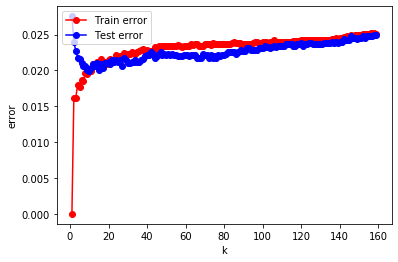

In [68]:
ran_k = range(1, 160, 1)
err_train_num = []
err_test_num = []

for i in ran_k:
    modify_k = KNeighborsClassifier(n_neighbors = i)
    modify_k.fit(X_train, y_train)
    err_train_num.append(np.mean(modify_k.predict(X_train) != y_train))
    err_test_num.append(np.mean(modify_k.predict(X_test) != y_test))
    
plt.plot(ran_k, err_train_num, 'r-o', label = 'Train error')
plt.plot(ran_k, err_test_num,  'b-o', label = 'Test error')
plt.xlabel('k')
plt.ylabel('error')
plt.legend(loc = 2)

Ошибка после выбора оптимального k не изменилась. Необходимо использовать другой метод.

# PCA

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)
X_PCA

array([[-1.27881306, -1.27309776],
       [-1.02052495, -0.20115627],
       [ 0.18828333,  0.4321021 ],
       ...,
       [ 0.68181491, -2.68609516],
       [-1.10388162, -0.11650503],
       [ 3.71241917, -4.90372042]])

Text(0, 0.5, 'second component0')

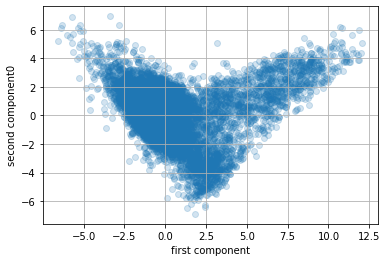

In [70]:
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], alpha = 0.2)
plt.grid()
plt.xlabel('first component')
plt.ylabel('second component0')


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 24)
N_train, _ = X_train.shape
N_test, _= X_test.shape
print(N_train, N_test)

12528 5370


In [72]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

print("Errors on train and test data")
print(np.mean(y_train != knn.predict(X_train)), np.mean(y_test != knn.predict(X_test)))

Errors on train and test data
0.02418582375478927 0.027932960893854747


In [73]:
print(X.shape)

(17898, 8)


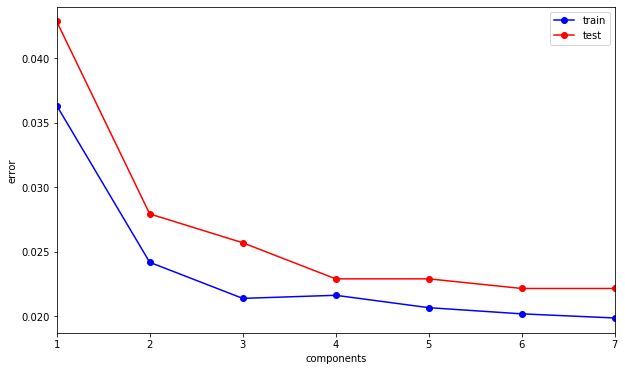

In [74]:
from sklearn.decomposition import PCA
components_num_array = np.arange(1, 8, 1)
train_error = []
test_error = []
for components_num in components_num_array:
    pca = PCA(n_components = components_num)
    X_PCA = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 24)
    knn = KNeighborsClassifier(n_neighbors = 8)
    knn.fit(X_train, y_train)
    
    train_error.append(np.mean(y_train != knn.predict(X_train)))
    test_error.append(np.mean(y_test != knn.predict(X_test)))
    
plt.figure(figsize = (10, 6))
plt.plot(components_num_array, train_error, 'b-o', label = 'train')
plt.plot(components_num_array, test_error, 'r-o', label = 'test')
plt.xlim([np.min(components_num_array), np.max(components_num_array)])
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

# Нейронные сети

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [76]:
alpha = 5
mlp_model = MLPClassifier(hidden_layer_sizes = (2, ), solver = 'lbfgs', activation = 'logistic', alpha = alpha)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print("Errors on train and test data")
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

Errors on train and test data
0.01995530012771392 0.022160148975791435


In [77]:
#alphas = np.logspace(-3, -0.5, 21) * len(X_train.columns)
alphas = np.logspace(-3, -0.5, 21)

In [78]:
print("Таблица alpha:", alphas)

Таблица alpha: [0.001      0.00133352 0.00177828 0.00237137 0.00316228 0.00421697
 0.00562341 0.00749894 0.01       0.01333521 0.01778279 0.02371374
 0.03162278 0.04216965 0.05623413 0.07498942 0.1        0.13335214
 0.17782794 0.23713737 0.31622777]


In [79]:
grid_classifier = GridSearchCV(mlp_model, scoring = make_scorer(accuracy_score),
                              param_grid = {'alpha': alphas},
                              cv = 10,
                              return_train_score = True)
grid_classifier.fit(X_train, y_train)
best_alpha = grid_classifier.best_estimator_.alpha
print('Достигнутое минимальное значение ошибки: ', 1 - grid_classifier.best_score_,
      'при alpha = ' + str(best_alpha))

best_test_pred = grid_classifier.predict(X_test)
best_test_err = np.mean(best_test_pred != y_test)
print('Минимальное значение ошибки на тестовой выборке: ', best_test_err)

Достигнутое минимальное значение ошибки:  0.01851851851851849 при alpha = 0.01778279410038923
Минимальное значение ошибки на тестовой выборке:  0.022532588454376164


График зависимости ошибки от alpha

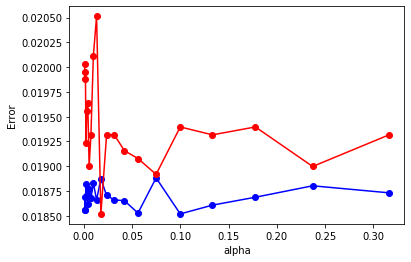

In [80]:
cv_mean_train_scores_by_alpha = sum(1 - grid_classifier.cv_results_["mean_train_score"].reshape(-1, len(alphas))) / (len(grid_classifier.cv_results_["mean_train_score"]) / len(alphas))
plt.plot(alphas, cv_mean_train_scores_by_alpha, 'b-o', label = 'train')
plt.xlabel("alpha")
plt.ylabel("Error")

cv_mean_test_scores_by_alpha = sum(1 - grid_classifier.cv_results_["mean_test_score"].reshape(-1, len(alphas))) / (len(grid_classifier.cv_results_["mean_test_score"]) / len(alphas))
plt.plot(alphas, cv_mean_test_scores_by_alpha, 'r-o', label = 'test')

Рассмотрим различные значения числа нейронов в скрытом слое

In [81]:
neurons = [(n,) for n in range(1, 20, 1)]

In [82]:
print("Число нейронов: ", neurons)

Число нейронов:  [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,)]


In [83]:
grid_classifier = GridSearchCV(mlp_model, scoring = make_scorer(accuracy_score),
                              param_grid = {'alpha': (best_alpha,), 'hidden_layer_sizes': neurons},
                              cv = 10, return_train_score = True)
grid_classifier.fit(X_train, y_train)

print('Достигнуто минимальное значение ошибки:', 1 - grid_classifier.best_score_,
     'при числе нейронов = ' + str(grid_classifier.best_estimator_.hidden_layer_sizes))

best_test_predictions = grid_classifier.predict(X_test)
best_test_err = np.mean(best_test_predictions != y_test)
print('Минимальное значение ошибки на тестовой выборке:', best_test_err)

Достигнуто минимальное значение ошибки: 0.01923690932311617 при числе нейронов = (4,)
Минимальное значение ошибки на тестовой выборке: 0.021787709497206705


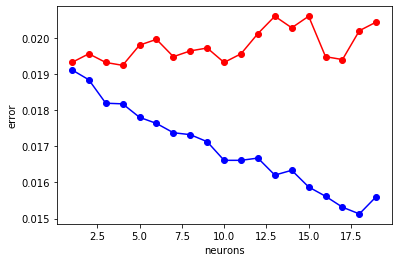

In [84]:
#cv_mean_train_scores_by_neurons = sum(1 - grid_classifier.cv_results_["mean_train_score"].reshape(-1, len(neurons)))/(len(grid_classifier.cv_results_["mean_train_score"]) / len(neurons))
#plt.plot(neurons, cv_mean_train_scores_by_neurons, 'b-0', label = 'train')
#plt.xlabel("neurons")
#plt.ylabel("error")

#cv_mean_test_scores_by_neurons = sum(1 - grid_classifier.cv_results_["mean_test_score"].reshape(-1, len(neurons)))/(len(grid_classifier.cv_results_["mean_test_score"]) / len(neurons))
#plt.plot(neurons, cv_mean_test_scores_by_neurons, 'r-o', label = 'test')
cv_mean_train_scores_by_neurons = sum(1-grid_classifier.cv_results_["mean_train_score"].reshape(-1, len(neurons))) / \
    (len(grid_classifier.cv_results_["mean_train_score"]) / len(neurons))
plt.plot(neurons, cv_mean_train_scores_by_neurons, 'b-o', label = 'train')
plt.xlabel("neurons")
plt.ylabel("error")

cv_mean_test_scores_by_neurons = sum(1-grid_classifier.cv_results_["mean_test_score"].reshape(-1, len(neurons))) / \
    (len(grid_classifier.cv_results_["mean_test_score"]) / len(neurons))
plt.plot(neurons, cv_mean_test_scores_by_neurons, 'r-o', label = 'test')

Рассмотрим разные значения альфа и размеры слоя

In [85]:
grif_classifier = GridSearchCV(mlp_model, scoring = make_scorer(accuracy_score),
                              param_grid = {'alpha': alphas, 'hidden_layer_sizen': neurons}, cv = 10)
grid_classifier.fit(X_train, y_train)

print('Достигнуто минимальное значение ошибки:', 1 - grid_classifier.best_score_,
     'при alpha = ' + str(grid_classifier.best_estimator_.alpha),
     'при числе нейронов = ' + str(grid_classifier.best_estimator_.hidden_layer_sizes))

best_test_predictions = grid_classifier.predict(X_test)
best_test_err = np.mean(best_test_predictions != y_test)
print('Минимальное значение ошибки на тестовой выборке:', best_test_err)

Достигнуто минимальное значение ошибки: 0.018837803320561952 при alpha = 0.01778279410038923 при числе нейронов = (7,)
Минимальное значение ошибки на тестовой выборке: 0.02346368715083799


Результаты похожи на значения, полученные kNN классификатором. Попробуем посмотреть зависимость ошибки от числа нейронов во втором слое при оптимальном alpha и оптимальном числе нейронов на первом слое.

In [86]:
best_neuron = grid_classifier.best_estimator_.hidden_layer_sizes[0]
second_layer_neurons = [(best_neuron, n) for n in range(1, 20, 1)]
print(second_layer_neurons)

[(7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19)]


In [87]:
grid_classifier = GridSearchCV(mlp_model, scoring = make_scorer(accuracy_score),
                              param_grid = {'alpha': (best_alpha, ), 'hidden_layer_sizes': second_layer_neurons},
                              cv = 10, return_train_score = True)
grid_classifier.fit(X_train, y_train)

print('Достигнуто минимальное значение ошибки:', 1 - grid_classifier.best_score_,
     'при alpha = ' + str(grid_classifier.best_estimator_.alpha),
     'при числе нейронов = ' + str(grid_classifier.best_estimator_.hidden_layer_sizes))

best_test_predictions = grid_classifier.predict(X_test)
best_test_err = np.mean(best_test_predictions != y_test)
print('Минимальное значение ошибки на тестовой выборке:', best_test_err)

Достигнуто минимальное значение ошибки: 0.019157088122605415 при alpha = 0.01778279410038923 при числе нейронов = (7, 15)
Минимальное значение ошибки на тестовой выборке: 0.02346368715083799


С добавлением нового слоя минимальное значение ошибки на тестовой выборке

# Random Forest

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 24)

In [89]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

print("Ошибки на обучающей и тестовой выборках:")
print(np.mean(y_train != rf.predict(X_train)), np.mean(y_test != rf.predict(X_test)))

Ошибки на обучающей и тестовой выборках:
0.0 0.020484171322160148


График зависимости ошибки на обучающей и тестовой выборке

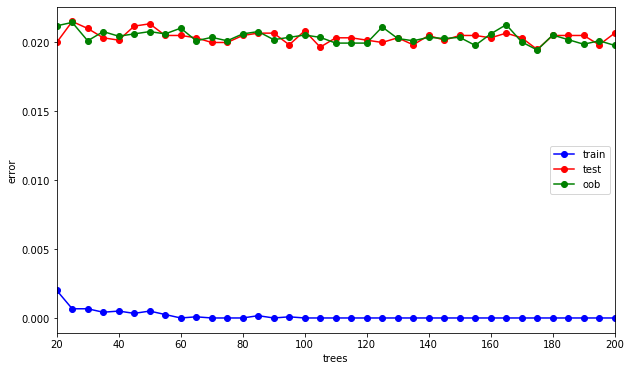

In [90]:
trees_num_array = np.arange(20, 201, 5)
train_error = []
test_error = []
out_of_back_error = []
for trees_num in trees_num_array:
    rf = ensemble.RandomForestClassifier(n_estimators = trees_num, oob_score = True)
    rf.fit(X_train, y_train)
    
    train_error.append(np.mean(y_train != rf.predict(X_train)))
    test_error.append(np.mean(y_test != rf.predict(X_test)))
    out_of_back_error.append(1 - rf.oob_score_)
    
plt.figure(figsize = (10, 6))
plt.plot(trees_num_array, train_error, 'b-o', label = 'train')
plt.plot(trees_num_array, test_error, 'r-o', label = 'test')
plt.plot(trees_num_array, out_of_back_error, 'g-o', label = 'oob')
plt.xlim([np.min(trees_num_array), np.max(trees_num_array)])
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [91]:
print("Минимальное значение ошибок:")
print(np.min(train_error), np.min(test_error))
print("Оптимальное количество деревьев")
print(trees_num_array[test_error == np.min(test_error)][0])

Минимальное значение ошибок:
0.0 0.01946842728965634
Оптимальное количество деревьев
175


# Gradient Boosted Trees

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 24)

In [93]:
grbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
grbt.fit(X_train, y_train)

print("Ошибки на обучающей и тестовой выборках:")
print(np.mean(y_train != grbt.predict(X_train)), np.mean(y_test != grbt.predict(X_test)))

Ошибки на обучающей и тестовой выборках:
0.01242598615628388 0.02319282207550364


График зависимости ошибки на обучающей и тестовой выборке

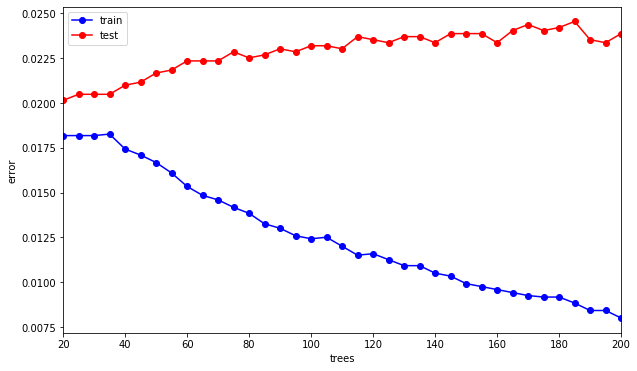

In [94]:
trees_num_array = np.arange(20, 201, 5)
train_error = []
test_error = []
for trees_num in trees_num_array:
    grbt = ensemble.GradientBoostingClassifier(n_estimators = trees_num)
    grbt.fit(X_train, y_train)
    
    train_error.append(np.mean(y_train != grbt.predict(X_train)))
    test_error.append(np.mean(y_test != grbt.predict(X_test)))
    
plt.figure(figsize = (10, 6))
plt.plot(trees_num_array, train_error, 'b-o', label = 'train')
plt.plot(trees_num_array, test_error, 'r-o', label = 'test')
plt.xlim([np.min(trees_num_array), np.max(trees_num_array)])
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Наблюдается переобучение на всем множестве деревьев

In [95]:
print("Минимальное значение ошибок:")
print(np.min(train_error), np.min(test_error))
print("Оптимальное количество деревьев")
print(trees_num_array[test_error == np.min(test_error)][0])

Минимальное значение ошибок:
0.008006004503377533 0.020145589977992213
Оптимальное количество деревьев
20


# Extremely Random Forest

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [97]:
erf = ensemble.ExtraTreesClassifier(n_estimators = 100)
erf.fit(X_train, y_train)

print("Ошибки на обучающей и тестовой выборках:")
print(np.mean(y_train != erf.predict(X_train)), np.mean(y_test != erf.predict(X_test)))

Ошибки на обучающей и тестовой выборках:
0.0 0.021042830540037243


c:\users\semen\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\semen\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


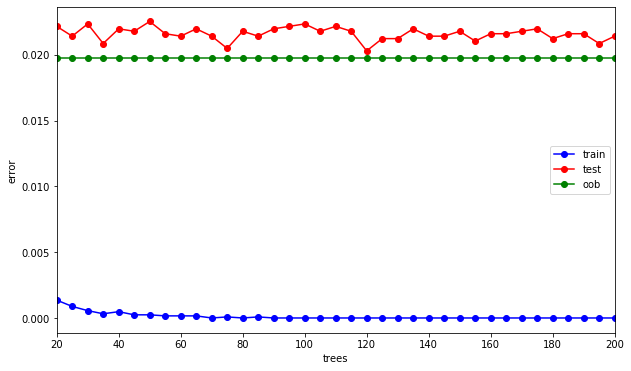

In [98]:
trees_num_array = np.arange(20, 201, 5)
train_error = []
test_error = []
out_of_back_error = []
for trees_num in trees_num_array:
    erf = ensemble.ExtraTreesClassifier(n_estimators = trees_num, bootstrap = True, oob_score = True)
    erf.fit(X_train, y_train)
    
    train_error.append(np.mean(y_train != erf.predict(X_train)))
    test_error.append(np.mean(y_test != erf.predict(X_test)))
    out_of_back_error.append(1 - rf.oob_score_)
    
plt.figure(figsize = (10, 6))
plt.plot(trees_num_array, train_error, 'b-o', label = 'train')
plt.plot(trees_num_array, test_error, 'r-o', label = 'test')
plt.plot(trees_num_array, out_of_back_error, 'g-o', label = 'oob')
plt.xlim([np.min(trees_num_array), np.max(trees_num_array)])
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [99]:
print("Минимальное значение ошибок:")
print(np.min(train_error), np.min(test_error))
print("Оптимальное количество деревьев")
print(trees_num_array[test_error == np.min(test_error)][0])

Минимальное значение ошибок:
0.0 0.020297951582867783
Оптимальное количество деревьев
120


# AdaBoost

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [101]:
ab = ensemble.AdaBoostClassifier(n_estimators = 100)
ab.fit(X_train, y_train)

print("Ошибки на обучающей и тестовой выборках:")
print(np.mean(y_train != ab.predict(X_train)), np.mean(y_test != ab.predict(X_test)))

Ошибки на обучающей и тестовой выборках:
0.018358876117496807 0.02346368715083799


График зависимости ошибки на обучающей и тестовой выборках

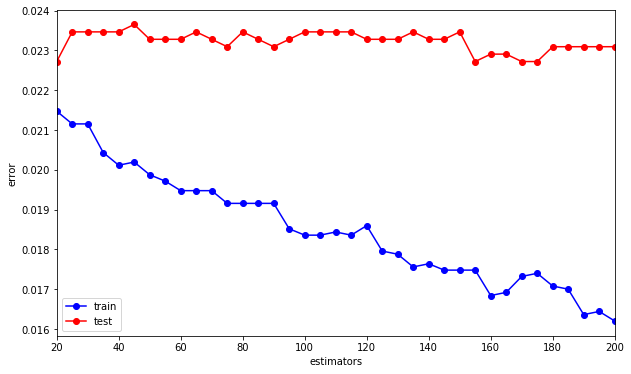

In [102]:
est_num_array = np.arange(20, 201, 5)
train_error = []
test_error = []
for est_num in est_num_array:
    ab = ensemble.AdaBoostClassifier(n_estimators = est_num)
    ab.fit(X_train, y_train)
    
    train_error.append(np.mean(y_train != ab.predict(X_train)))
    test_error.append(np.mean(y_test != ab.predict(X_test)))
    
plt.figure(figsize = (10, 6))
plt.plot(trees_num_array, train_error, 'b-o', label = 'train')
plt.plot(trees_num_array, test_error, 'r-o', label = 'test')
plt.xlim([np.min(trees_num_array), np.max(trees_num_array)])
plt.xlabel('estimators')
plt.ylabel('error')
plt.legend()
pass